## Quantum Wavepacket under influence of  MORSE'S POTENTIAL

In [113]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
from IPython.display import Latex
plt.style.use("seaborn-whitegrid")
%matplotlib inline

delta = 0.01
L = 6
N = 600
x = np.arange(-L,L+delta,delta)
lamda = 1000.0

def kronecker(x,y):
    return 1 if x==y else 0

def V(y):
    return lamda*(pow(1 - np.exp(-y),2))

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) 
H_eigenvalues_1, H_eigenvectors_1 = lin.eigh(H)
H_eigenvalues_1=H_eigenvalues_1/(2*np.sqrt(lamda)) 

potential_1 = np.array([V(delta*i) for i in range(-N,N+1)])
for i in range(0,4):
    print(f" {i+1} energy eigenvalue = {H_eigenvalues_1[i]}")

 1 energy eigenvalue = 0.4959503874088647
 2 energy eigenvalue = 1.463966934879809
 3 energy eigenvalue = 2.400055033381988
 4 energy eigenvalue = 3.3042706809501774


## CODE FOR POTENTIAL WELL AND COMPARING GRAPHS

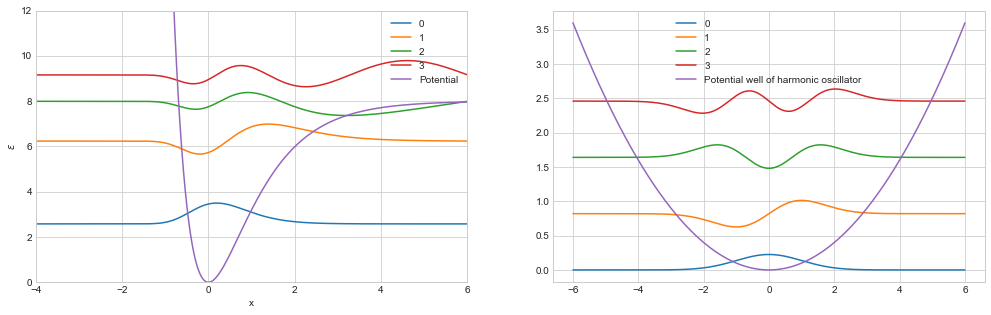

In [106]:
delta = 0.01
L = 6. 
N = 600 # No. of lattice points is 2N+1
x = np.arange(-6.,6.+delta,delta)

def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return z**2

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points
psi = H_eigenvectors[:,0] # Ground state wavefunction
#plt.plot(x, psi, label="eigenfunction")

f,axs = plt.subplots(2,2,figsize = (17,5))
plt.subplot(1,2,1)
N = 4
for i in range(0,N):
    plt.plot(x,10* H_eigenvectors_1[:,i] + 2*np.sqrt(lamda)*H_eigenvalues_1[i],label=i )

plt.plot(x, potential_1, label="Potential")
plt.xlabel('x')
plt.ylabel('$\epsilon$')
plt.ylim(0,12)
plt.xlim(-4,6)
plt.legend();

plt.subplot(1,2,2)
for i in range(0,4):
    plt.plot(x,3*H_eigenvectors[:,i] + 0.82*i,label=i )
plt.plot(x,10*potential, label="Potential well of harmonic oscillator")
plt.legend();

## Comparision between POTENTIAL WELL and MORSE'S POTENTIAL
We can clearly see that in Morse's potential for the eigenfunctions , the energy eigen values of which lies above the $D_{e}$ potential show scattering states and the energy eigen values of which lies under the potential barrier shows bound states ; also if we see from $ -1 < x < 2 $ the bound states also show some oscillations but as soon as they enter into the $D_{e}$ region their oscillations starts to become flat. Eigenfunctions corresponding to $3$ and above are scattering states , rest all eigenfunctions below $3$ are bound states. Apart from the graph , I have observed that as we keep increasing the value of $\lambda$, the energy eigenvalues approach the nature of a harmonic oscillator

Similarly in Potential Well graph oscillations are only observed as long as the eigenfunction lies inside the $U$ as soon as it comes outside the $U$ , the oscillations start to fade away and eventually become flat